<a href="https://colab.research.google.com/github/dymiyata/intro-to-ml-and-ai-2025-2026/blob/main/train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Test Split and Model Comparison

First we import the usual libraries and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Let's create some synthetic data:

In [2]:
# Setting the random seed
rng = np.random.default_rng(seed=2025)

m = 100
x1 = np.linspace(0, 20, m)[:, np.newaxis]

y = 0.2 * x1**2 - 3 * x1 + 20 + 4*rng.standard_normal((m, 1))

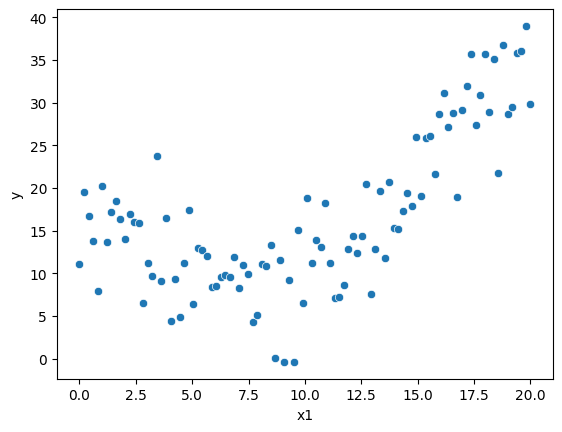

In [3]:
sns.scatterplot(x = x1[:,0], y = y[:,0])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

Scikit-learn has a function `train_test_split` to spilt our data into a training set and testing set. To use it, we first need to import it.

In [4]:
from sklearn.model_selection import train_test_split

Now we can use it to automatically randomly split our data into two sets:
- A training set (used to train the models)
- A testing set (used to evaluate how the model generalizes)

The `train_test_split` function let's you select what proportion of the data will be used for testing. The rest will be put in the training set. A good rule of thumb is to use about 80\% of your data for training and 20\% of the data for testing.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=2025
)

In [9]:
y_train.shape

(80, 1)

Now let's create four different models (degree 1, degree 2, degree 3, and degree 15).

To ensure that the features stay roughly the same size, we normalize them.

In [17]:
model1 = LinearRegression() # linear
model2 = LinearRegression() # quadratic
model3 = LinearRegression()
model15 = LinearRegression()

In [36]:
X_train2 = np.column_stack([X_train[:,0], X_train[:,0]**2])
X_train3 = np.column_stack([X_train[:,0], X_train[:,0]**2, X_train[:,0]**3])
X_train15 = np.column_stack([0.1**n * X_train[:,0]**n for n in range(1,16)])

In [37]:
X_test2 = np.column_stack([X_test[:,0], X_test[:,0]**2])
X_test3 = np.column_stack([X_test[:,0], X_test[:,0]**2, X_test[:,0]**3])
X_test15 = np.column_stack([0.1**n * X_test[:,0]**n for n in range(1,16)])

In [38]:
model1.fit(X_train, y_train)
model2.fit(X_train2, y_train)
model3.fit(X_train3, y_train)
model15.fit(X_train15, y_train)


LinearRegression()

In [39]:
y_pred_train1 = model1.predict(X_train)
y_pred_train2 = model2.predict(X_train2)
y_pred_train3 = model3.predict(X_train3)
y_pred_train15 = model15.predict(X_train15)

In [40]:
y_pred_test1 = model1.predict(X_test)
y_pred_test2 = model2.predict(X_test2)
y_pred_test3 = model3.predict(X_test3)
y_pred_test15 = model15.predict(X_test15)

In [41]:
mse_train1 = mean_squared_error(y_pred_train1, y_train)
mse_train2 = mean_squared_error(y_pred_train2, y_train)
mse_train3 = mean_squared_error(y_pred_train3, y_train)
mse_train15 = mean_squared_error(y_pred_train15, y_train)

In [42]:
mse_test1 = mean_squared_error(y_pred_test1, y_test)
mse_test2 = mean_squared_error(y_pred_test2, y_test)
mse_test3 = mean_squared_error(y_pred_test3, y_test)
mse_test15 = mean_squared_error(y_pred_test15, y_test)

In [43]:
for mse in [mse_train1, mse_train2, mse_train3, mse_train15]:
  print(mse)

45.186465627018435
20.503302935115375
20.402640906196574
16.498529236074372


In [44]:
for mse in [mse_test1, mse_test2, mse_test3, mse_test15]:
  print(mse)

60.5257787703056
19.30593611028508
21.439693202884776
29.660544390590065
